In [72]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
churndata_df=pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv')

In [74]:
churn_df = churndata_df.copy()

In [75]:
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


customerId-each customer holds its unique ID
Senior Citizen- Whether person is senior citizen or not included by 0 or 1.
tenure- No of years Cusomer has worked in the company.
ServiceCount- Serice/Product used by customer
Contract-Contract term of the customer
PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)
MonthlyCharges:Customer charged monthly
Total charges:Charges paid in total by customer

In [76]:
#TotalCharges are having blank rows
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7016 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [77]:
#check if there are any null values for all the columns and take sum
churn_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
tenure               0
ServiceCount         0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        27
Churn                0
dtype: int64

In [78]:
#Here we observed that Total charges are having 27rows as blank


In [79]:
print("Rows :", churn_df.shape[0])
print("Columns :", churn_df.shape[1])
print("Features: \n",churn_df.columns.tolist())
print("Missing values:",churn_df.isnull().any())

Rows : 7043
Columns : 10
Features: 
 ['customerID', 'gender', 'SeniorCitizen', 'tenure', 'ServiceCount', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']
Missing values: customerID          False
gender              False
SeniorCitizen       False
tenure              False
ServiceCount        False
Contract            False
PaperlessBilling    False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool


In [80]:
churn_df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
tenure              False
ServiceCount        False
Contract            False
PaperlessBilling    False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [81]:
churn_df[churn_df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No


### We observed that the column tensure is blank where we got blank values and monthly charges is having good relationship with total charges and having relationship with tenure.

In [82]:
churn_df[churn_df['tenure']==0]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No
3331,7644-OMVMY,Male,0,0,7,Two year,No,19.85,NaN,No
3826,3213-VVOLG,Male,0,0,8,Two year,No,25.35,NaN,No
4380,2520-SGTTA,Female,0,0,7,Two year,No,20.00,NaN,No
5218,2923-ARZLG,Male,0,0,7,One year,Yes,19.70,NaN,No
6670,4075-WKNIU,Female,0,0,7,Two year,No,73.35,NaN,No


In [83]:
churn_df['TotalCharges'].describe()

count    7016.000000
mean     2282.589168
std      2265.506114
min        18.800000
25%       401.925000
50%      1397.100000
75%      3792.325000
max      8684.800000
Name: TotalCharges, dtype: float64

##### here we cannot replace it with mean and median as there is dependency of  total charges based on tenure an employee worked so we will focus now on values where churn is No


In [84]:
churn_df[churn_df["Churn"]=='No'].describe()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5174.000000,5174.000000,5147.000000
mean,0.128721,37.569965,5.811751,61.265124,2555.220264
std,0.334923,24.113777,1.890418,31.092648,2328.034938
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,0.000000,15.000000,4.000000,25.100000,579.200000
50%,0.000000,38.000000,6.000000,64.425000,1685.900000
75%,0.000000,61.000000,7.000000,88.400000,4263.725000
max,1.000000,72.000000,9.000000,118.750000,8672.450000


###### Here we found that mean and median is also having lot of variation. In the below graph we are going to find out boxplot using seaborn library and observe how total price with Churn or not

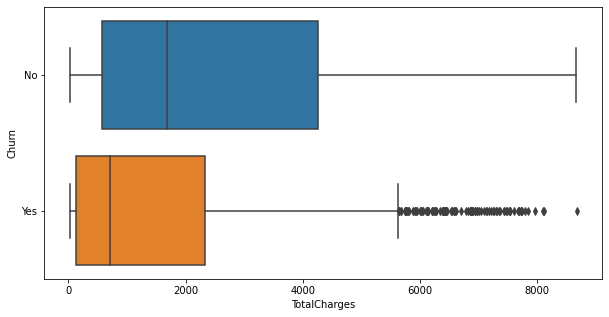

In [85]:
plt.figure(figsize=(10,5))
sns.boxplot(x='TotalCharges',y='Churn',data=churn_df)

In [86]:
''' Above graph shows that we are having Churn as Yes than there are many outliers and we need to least bother about it 
only going to talk about Churn as No. We found that data is not normally distributed and 25% quintile value of total charges is around 529
and mean, median value is not going to help in order to impute as there is high variation


'''

' Above graph shows that we are having Churn as Yes than there are many outliers and we need to least bother about it \nonly going to talk about Churn as No. We found that data is not normally distributed and 25% quintile value of total charges is around 529\nand mean, median value is not going to help in order to impute as there is high variation\n\n\n'

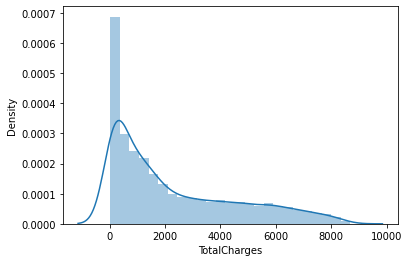

In [87]:
sns.distplot(churn_df['TotalCharges'], hist=True)

In [88]:
# here we can see that the data is rightly skewed and not gaussian distribution

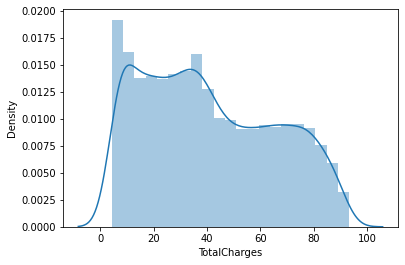

In [89]:
sns.distplot(churn_df['TotalCharges'].apply(np.sqrt),hist=True)

Here we found that after taking square root of df[Totalcharges] we found that it looks better in terms of the distribution

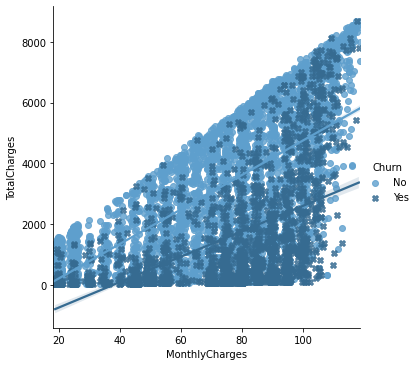

In [90]:
sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=churn_df,fit_reg=True,hue='Churn',markers=['o','X'], palette="Blues_d")

lmplot is used to check Total Price varying 
with Monthly charges, We will find the effect on TotalCharges with the help of Monthly Charges

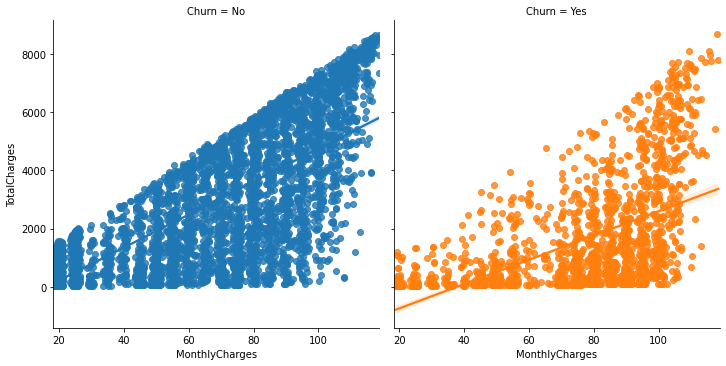

In [91]:
sns.lmplot(x='MonthlyCharges', y='TotalCharges', data=churn_df, fit_reg=True,hue="Churn",col="Churn")

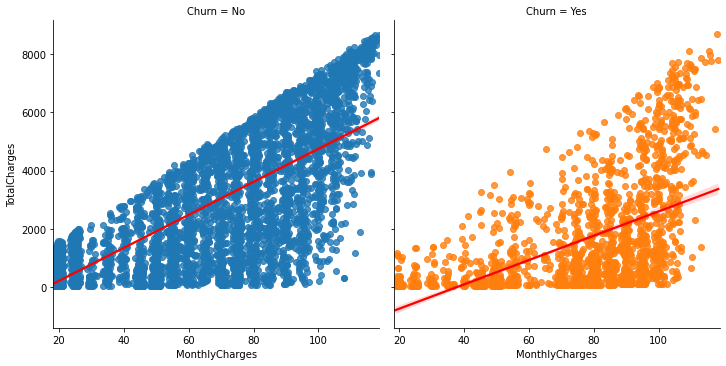

In [92]:
sns.lmplot(x='MonthlyCharges', y='TotalCharges', data=churn_df, fit_reg=True,hue="Churn",col="Churn",line_kws={'color':'red'})

Here we found that errors are high between monthlyCharges and Total Charges and we are only going to check for Churns='No' as we need only impute for Churns=NO.
We can see that imputing is not possible .Data is spread across.

In [93]:
churn_df[['TotalCharges','MonthlyCharges']].corr()

,TotalCharges,MonthlyCharges
TotalCharges,1.000000,0.650964
MonthlyCharges,0.650964,1.000000


Here we observed that there is strong positive 
correlation of Monthly Charges around 65% with Total Charges


In [94]:
churn_df[churn_df['Churn']=='No'][['TotalCharges','MonthlyCharges']].corr()

,TotalCharges,MonthlyCharges
TotalCharges,1.00000,0.75739
MonthlyCharges,0.75739,1.00000


Here Correlation is increased between totalcharges and monthlyCharges as 75% and positively correlalted for No data with Churn.

In [95]:
churn_No_df=churn_df[(churn_df['Churn']=='No') & (churn_df['TotalCharges'].isna()==False)]

In [96]:
churn_No_df.shape[0]

5147

In [97]:
from scipy import stats
#We import stats linear regression package to calculate linear least square regression and we will use two features independent and dependent variable. Here 
#Total Charges is depenndent variable and independent variable used is Monthly Charges

In [98]:
slope,intercept,r_value,p_value,stderror=stats.linregress(churn_No_df['MonthlyCharges'],churn_No_df['TotalCharges'])

In [99]:
print("Slope",slope)
print("Intercept",intercept)
print("R value",r_value)
print("Pvalue",p_value)
print("Standard eror",stderror)
print("R2 error",r_value**2)

Slope 56.73637552696062
Intercept -922.8160085118097
R value 0.7573902887184033
Pvalue 0.0
Standard eror 0.6819261867835148
R2 error 0.5736400494449463


Standard Error is 0.68 percent and R2 Error proportion of variance in dependent that is predicatable in indepdent variable 

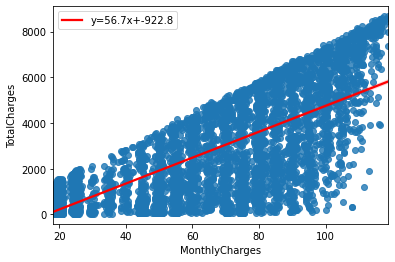

In [100]:
ax=sns.regplot(x='MonthlyCharges', y='TotalCharges', data=churn_No_df,line_kws={'color':'red','label':'y={0:.1f}x+{1:.1f}'.format(slope,intercept)})
ax.legend(loc="best")

High Error we are getting so we will choose other columns like tenure.

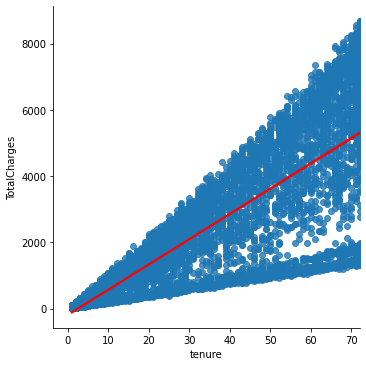

In [101]:
sns.lmplot(x='tenure',y='TotalCharges',data=churn_df,fit_reg=True,line_kws={'color':'red'})

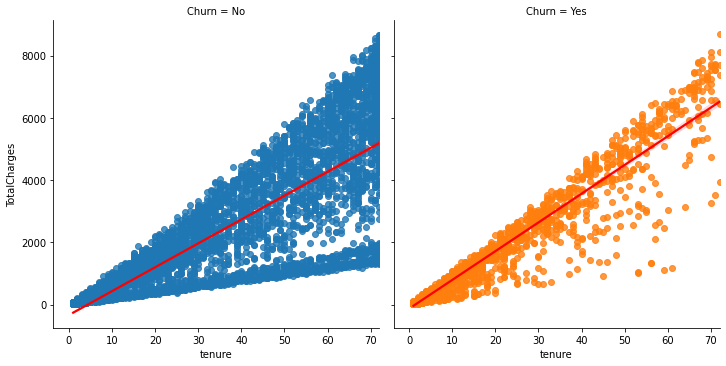

In [102]:
sns.lmplot(x='tenure',y='TotalCharges',data=churn_df, fit_reg=True,hue='Churn', col="Churn",line_kws={'color':'red'})

Currently the line is still far away from the line.


In [103]:
churn_df[['TotalCharges','tenure']].corr()

,TotalCharges,tenure
TotalCharges,1.000000,0.826066
tenure,0.826066,1.000000


In [104]:
slope,intercepts,r_value,p_value,std_error=stats.linregress(churn_No_df['tenure'],churn_No_df['TotalCharges'])

In [105]:
print("Slope",slope)
print("Intercepts",intercepts)
print("R value:",r_value)
print("P Value: ",p_value)
print("Standard Error: ",std_error)
print("R squared Error ",r_value**2)

Slope 76.74259761920021
Intercepts -334.08560506046933
R value: 0.793287728023258
P Value:  0.0
Standard Error:  0.8211475250987232
R squared Error  0.6293054194323026


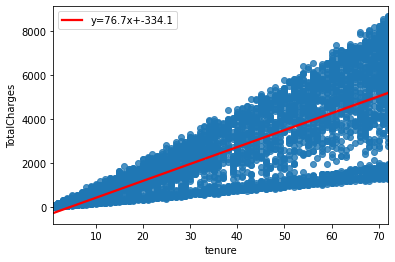

In [106]:
ax=sns.regplot(x='tenure',y='TotalCharges',data=churn_No_df,line_kws={'color':'red','label':'y={0:.1f}x+{1:.1f}'.format(slope,intercepts)})
ax.legend(loc="best")

In [107]:
churn_No_df['tenure_charges']=churn_No_df['MonthlyCharges']*churn_No_df['tenure']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [108]:
churn_No_df

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,tenure_charges
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No,29.85
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No,1936.30
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No,1903.50
6,1452-KIOVK,Male,0,22,5,Month-to-month,Yes,89.10,1949.40,No,1960.20
7,6713-OKOMC,Female,0,10,2,Month-to-month,No,29.75,301.90,No,297.50
...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0,72,7,Two year,Yes,21.15,1419.40,No,1522.80
7038,6840-RESVB,Male,0,24,8,One year,Yes,84.80,1990.50,No,2035.20
7039,2234-XADUH,Female,0,72,7,One year,Yes,103.20,7362.90,No,7430.40
7040,4801-JZAZL,Female,0,11,2,Month-to-month,Yes,29.60,346.45,No,325.60


In [109]:
churn_No_df[churn_No_df['Churn']=='No'][['tenure_charges','TotalCharges']].corr()

,tenure_charges,TotalCharges
tenure_charges,1.000000,0.999535
TotalCharges,0.999535,1.000000


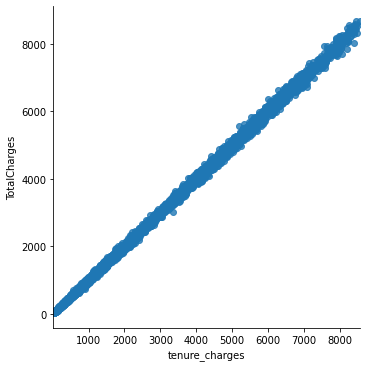

In [110]:
sns.lmplot(x='tenure_charges',y='TotalCharges',data=churn_No_df)

In [111]:
slope,intercepts,r_value,p_value,stderror=stats.linregress(churn_No_df['tenure_charges'],churn_No_df['TotalCharges'])

In [112]:
print ("slope     : " ,slope)
print ("intercept  : " ,intercepts)
print ("r_value :  " ,r_value)
print ("p_value :  ", p_value)
print ("std_err :  ",stderror)
print("R-squared: ",  r_value**2)

slope     :  1.0001720821518205
intercept  :  -0.3010983695039613
r_value :   0.9995350350972924
p_value :   0.0
std_err :   0.00042536192429779864
R-squared:  0.9990702863869455


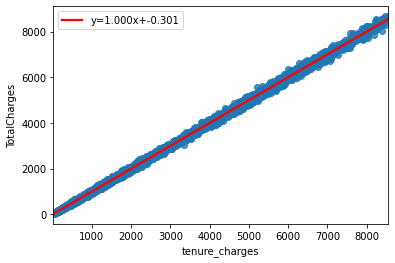

In [113]:
ax=sns.regplot(x='tenure_charges', y='TotalCharges', data=churn_No_df, line_kws={'color':'red','label':'y={0:.3f}x+{1:.3f}'.format(slope,intercepts)})
ax.legend(loc="best")

In [114]:
def fillna(tenure, monthlycharge):
  if tenure == 0 :
    totcharges = monthlycharge
  else :
    totcharges = tenure * monthlycharge
    totcharges = intercept+(totcharges*slope)
  return round(totcharges,2)

In [115]:
churn_df['TotChargeNew'] =churn_df.apply(lambda x: x['TotalCharges'] if not pd.isna(x['TotalCharges']) else fillna(x['tenure'],x['MonthlyCharges']), axis=1 )

In [116]:
churn_df[churn_df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotChargeNew
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No,3772.39
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No,52.55
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No,20.25
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No,80.85
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No,25.75
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No,-762.49
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No,2302.74
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No,56.05
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No,5059.01
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No,-565.55


In [117]:
churn_actual_df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_actual.csv')

In [118]:
churn_merged=pd.merge(churn_df, churn_actual_df)

In [119]:
churn_merged[churn_merged.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotChargeNew,TotChargesAct
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No,3772.39,4784.45
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No,52.55,
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No,20.25,
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No,80.85,
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No,25.75,
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No,-762.49,194.55
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No,2302.74,3242.5
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No,56.05,
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No,5059.01,5914.4
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No,-565.55,279.2
